In [2]:
# impor dataset, name it as df
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [4]:
# Dataset information

# Varible name and date type
for column in df.columns:
  print(f"{column}: {df[column].dtype}")

# Shape
df.shape

brand: object
model: object
model_year: int64
milage: object
fuel_type: object
engine: object
transmission: object
ext_col: object
int_col: object
accident: object
clean_title: object
price: object


(4009, 12)

In [6]:
# Numeric variables
from matplotlib.ticker import MaxNLocator
import re

# "milage"
df['milage'] = df['milage'].str.replace(r'\D', '', regex=True)
df['milage'] = df['milage'].astype(int)

# "price"
df['price'] = df['price'].str.replace(',', '', regex=True)
df['price'] = df['price'].str.replace(r'\$', '', regex=True)
df['price'] = df['price'].astype(int)

df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999


In [8]:
# Check cardinality for all categorical varibles (before input missing values)
categorical_columns = df.select_dtypes(include=['object']).columns
cardinality = {column: df[column].nunique() for column in categorical_columns}
threshold = 0.01 * len(df)
high_cardinality_cols = {col: count for col, count in cardinality.items() if count > threshold}
high_cardinality_cols

{'brand': 57,
 'model': 1898,
 'engine': 1146,
 'transmission': 62,
 'ext_col': 319,
 'int_col': 156}

In [10]:
# Handling missing values
missing_values = df.isnull().sum()
missing_values

# fuel_type
df['fuel_type'] = df['fuel_type'].fillna('Unknown') # treating missing fuel_type entries as "Unknown" maintains the categorical nature

# accident
np.random.seed(170)
df['accident'] = df['accident'].replace({'None reported': 'no'}) # normalized varible
df['accident'] = df['accident'].replace({'At least 1 accident or damage reported': 'yes'})
accident_missing_entry = df['accident'].isnull()
accident_random_choices = np.random.choice(['yes', 'no'], size=accident_missing_entry.sum())
df.loc[accident_missing_entry, 'accident'] = accident_random_choices  # Fill in missing values with random generate value 'yes' or 'no

# clean_title
df['clean_title'] = df['clean_title'].str.lower()
df['clean_title'] = df['clean_title'].replace({'accident or damage reported': 'no'}) # normalized varible
title_missing_entry = df['clean_title'].isnull()
title_random_choices = np.random.choice(['yes', 'no'], size=title_missing_entry.sum())
df.loc[title_missing_entry, 'clean_title'] = title_random_choices  # Fill in missing values with random generate value 'yes' or 'no
df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,yes,yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,yes,yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,no,yes,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,no,yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,no,yes,34999


In [12]:
# Check for missing value again
missing_values = df.isnull().sum()
missing_values

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [14]:
# Check cardinality (after handling missing values)
categorical_columns = df.select_dtypes(include=['object']).columns
cardinality = {column: df[column].nunique() for column in categorical_columns}
threshold = 0.01 * len(df)
high_cardinality_cols = {col: count for col, count in cardinality.items() if count > threshold}
high_cardinality_cols
# still the same variables that have high cardinality, handled missing values did not impact this

{'brand': 57,
 'model': 1898,
 'engine': 1146,
 'transmission': 62,
 'ext_col': 319,
 'int_col': 156}

In [16]:
# Remove high cadinality features (but keep brand, it's the important factor for car price in real life)
columns = ['model', 'engine', 'transmission', 'ext_col', 'int_col']
df = df.drop(columns, axis=1)
df.head()

,brand,model_year,milage,fuel_type,accident,clean_title,price
0,Ford,2013,51000,E85 Flex Fuel,yes,yes,10300
1,Hyundai,2021,34742,Gasoline,yes,yes,38005
2,Lexus,2022,22372,Gasoline,no,yes,54598
3,INFINITI,2015,88900,Hybrid,no,yes,15500
4,Audi,2021,9835,Gasoline,no,yes,34999


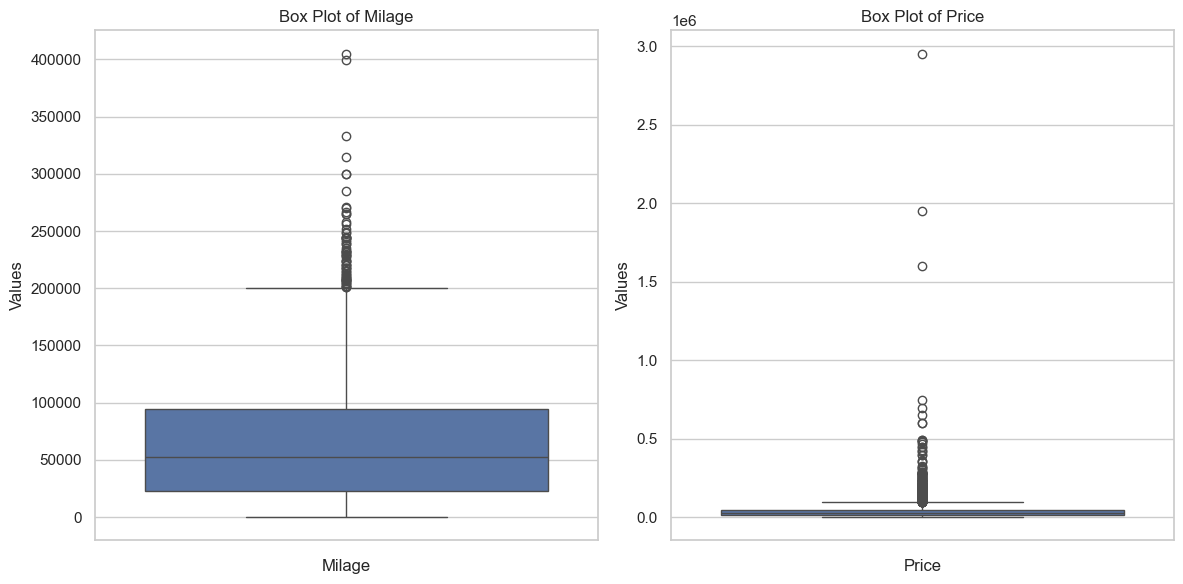

In [78]:
# Boxplots for numeric variables
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['milage'])
plt.title('Box Plot of Milage')
plt.xlabel('Milage')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

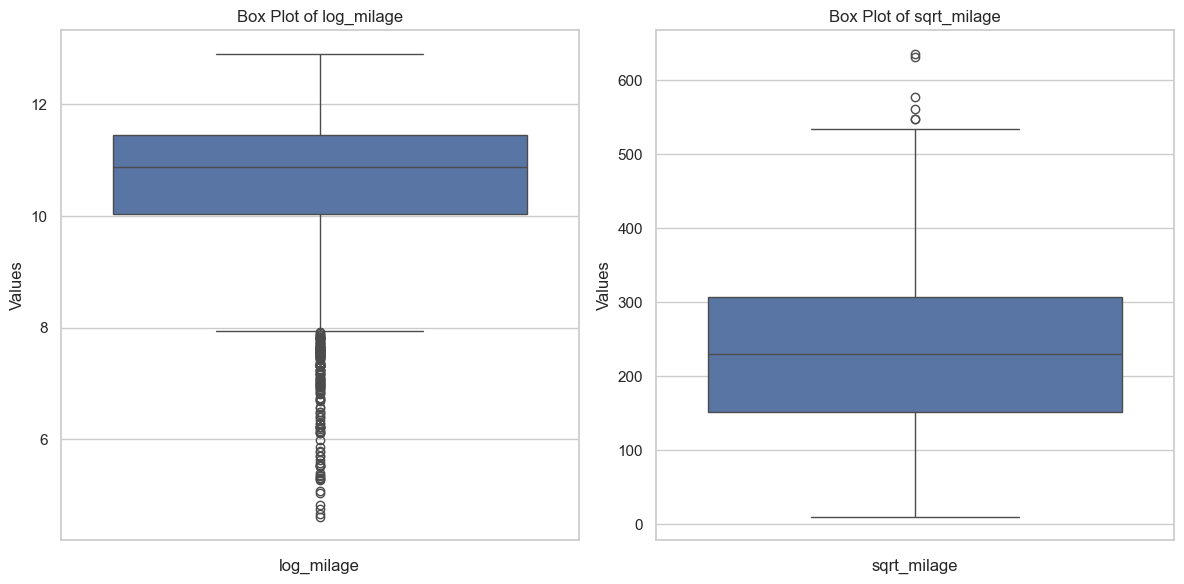

In [18]:
# Compare Log transformation and square root transformation for variable milage
import seaborn as sns
import matplotlib.pyplot as plt
df['log_milage'] = np.log(df['milage'] + 1)
df['sqrt_milage'] = np.sqrt(df['milage'])
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['log_milage'])
plt.title('Box Plot of log_milage')
plt.xlabel('log_milage')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['sqrt_milage'])
plt.title('Box Plot of sqrt_milage')
plt.xlabel('sqrt_milage')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

#sqrt is better

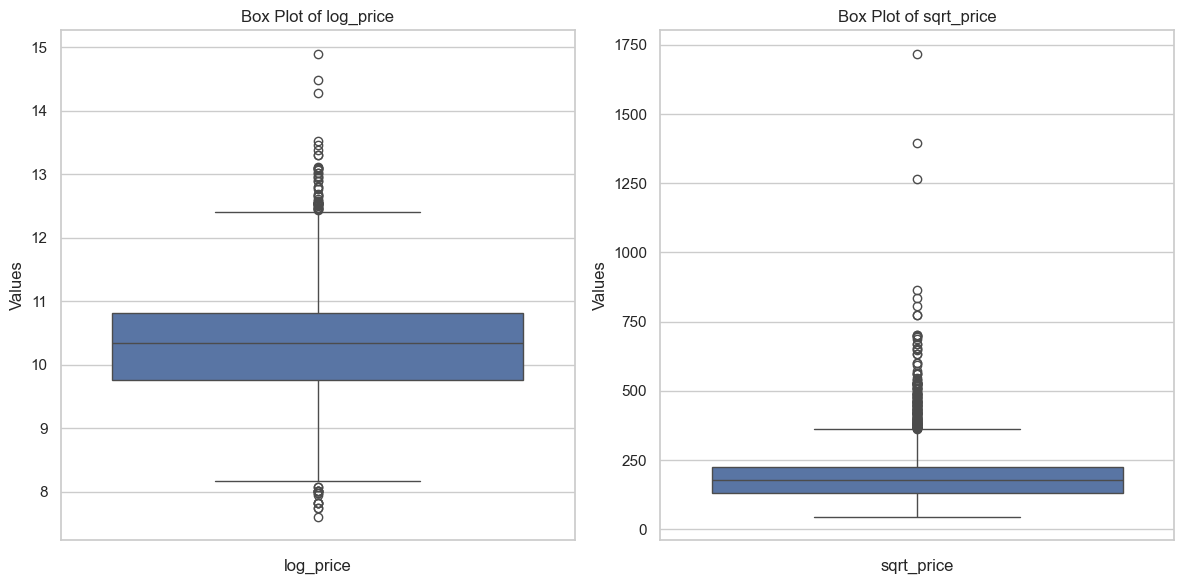

In [80]:
# Compare Log transformation and square root transformation for varibale price
import seaborn as sns
import matplotlib.pyplot as plt
df['log_price'] = np.log(df['price'] + 1)
df['sqrt_price'] = np.sqrt(df['price'])
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['log_price'])
plt.title('Box Plot of log_price')
plt.xlabel('log_price')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['sqrt_price'])
plt.title('Box Plot of sqrt_price')
plt.xlabel('sqrt_price')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

# log is better

In [20]:
df = df.drop(columns=['log_milage', 'sqrt_price','milage', 'price'])
df.head()

KeyError: "['sqrt_price'] not found in axis"

In [22]:
# Scatter Plot of Model Year vs Log_Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='model_year', y='log_price', data=df)
plt.title('Scatter Plot of Model Year vs Log(Price)')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

ValueError: Could not interpret value `log_price` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

<Figure size 1500x4500 with 0 Axes>

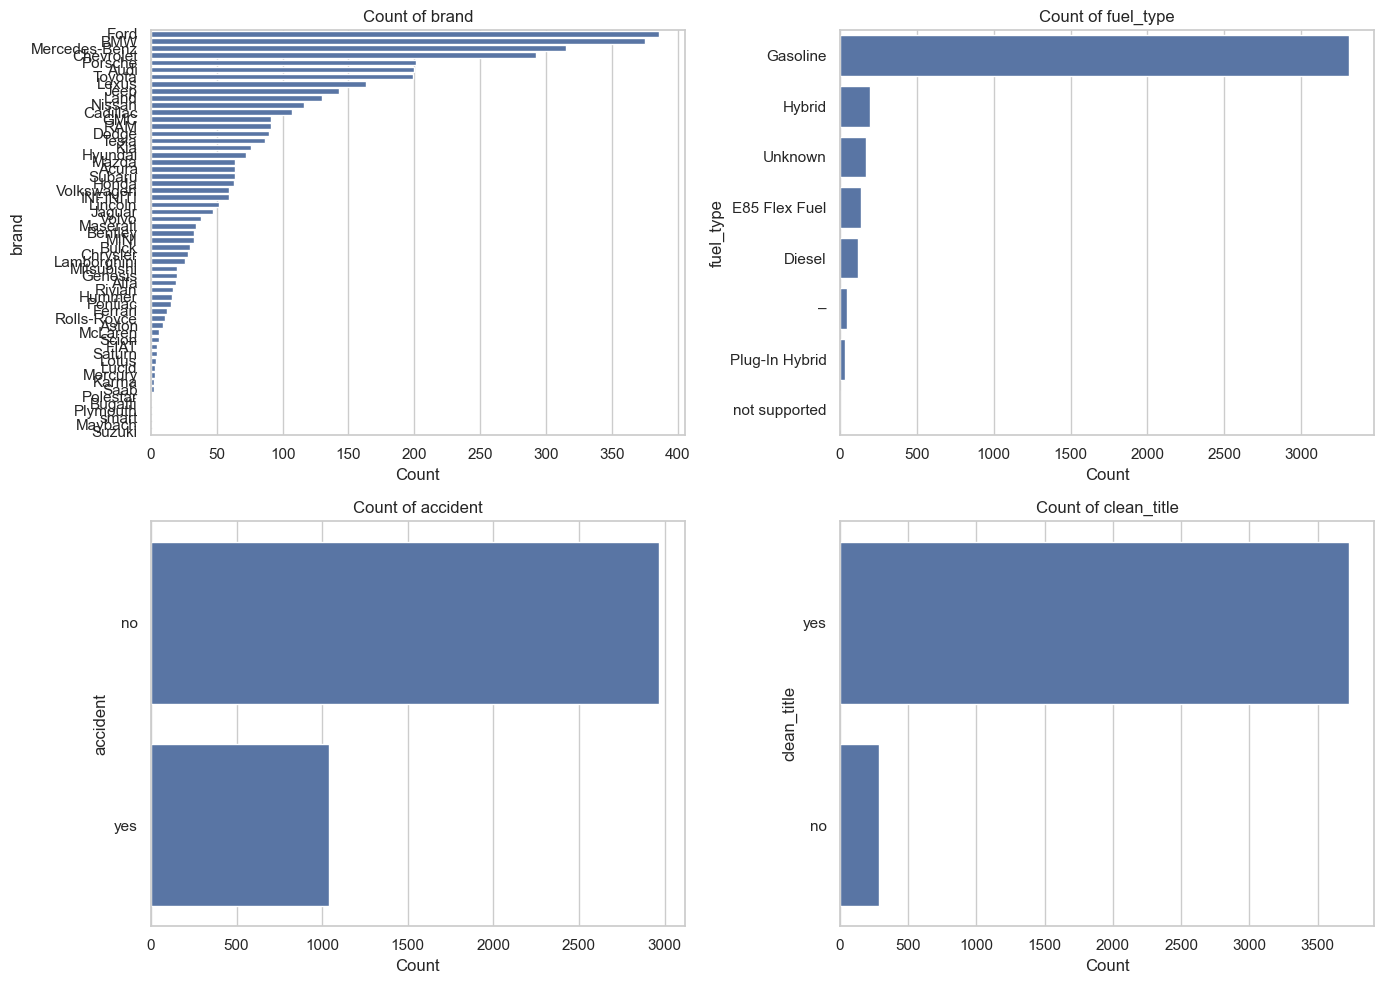

In [86]:
# Bar plots for categorical vars (varibles that do not have high cardinality)
sns.set(style="whitegrid")
plt.figure(figsize=(15, 45))

categorical_cols = ['brand', 'fuel_type', 'accident', 'clean_title']
plots_per_figure = 4
num_figures = (len(categorical_cols) + plots_per_figure - 1) // plots_per_figure

for i in range(num_figures):
    plt.figure(figsize=(14, 10))
    for j in range(plots_per_figure):
        index = i * plots_per_figure + j
        if index < len(categorical_cols):
            plt.subplot(2, 2, j + 1)
            sns.countplot(y=categorical_cols[index], data=df, order=df[categorical_cols[index]].value_counts().index)
            plt.title(f'Count of {categorical_cols[index]}')
            plt.xlabel('Count')
            plt.ylabel(categorical_cols[index])
    plt.tight_layout()
    plt.show()


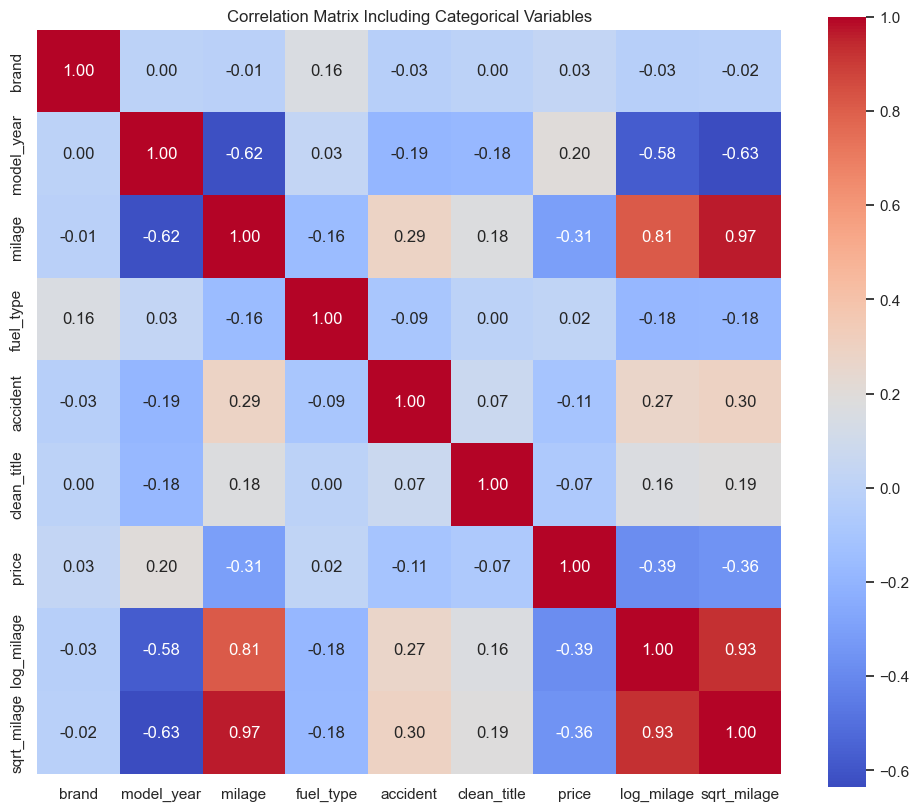

In [24]:
# Correlation Plot
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy()
for col in df.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])  # Convert each column to numeric

# Recalculate the correlation matrix with newly encoded columns
correlation_matrix = df1.corr()

# Plot the new correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Including Categorical Variables')
plt.show()

In [26]:
# Find highly correlated var
corr_matrix = df1.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
var = [column for column in upper.columns if any(upper[column] > 0.95)]
var

['sqrt_milage']

In [28]:
X = df.drop(columns="log_price")
y = df["log_price"]
print(y)

KeyError: "['log_price'] not found in axis"

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder # Reference from Stackoverflow
import pandas as pd
import math

df['log_price'] = np.log(df['price'] + 1)
df['sqrt_milage'] = np.sqrt(df['milage'])
X_numeric = df[['log_price', 'sqrt_milage','model_year']]

X_categorical= pd.get_dummies(df[['brand','fuel_type','accident', 'clean_title']])
# Taking the independent varible X, including varible and class
X= pd.concat([X_numeric, X_categorical], axis=1)

# Taking the dependent varible y, including the numeric varible
y= df['price']
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_features = X.shape[1]


# Create a Random Forest model
for num_features in [100, 300, 500, 700]:
    random_forest = RandomForestClassifier(max_features =math.ceil(math.sqrt(n_features)) , n_estimators=num_features, random_state=42)
    random_forest.fit(X_train, y_train)
    # Predict and evaluate 
    y_pred_rf = random_forest.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f'Random Forest Accuracy: {accuracy_rf:.2f}')


Random Forest Accuracy: 0.07
Random Forest Accuracy: 0.08
Random Forest Accuracy: 0.07
Random Forest Accuracy: 0.07


In [54]:
# DNN Model
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier, KerasRegressor # from the notebook of scikeras
from tensorflow.keras.regularizers import L1, L2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

df['log_price'] = np.log(df['price'] + 1)
df['sqrt_milage'] = np.sqrt(df['milage'])
X_numeric = df[['log_price', 'sqrt_milage','model_year']]
scaler = StandardScaler()
X_number_scale = scaler.fit_transform(X_numeric)
X_number_scaled = pd.DataFrame(X_number_scale, columns=X_numeric.columns)  
X_categorical= pd.get_dummies(df[['brand','fuel_type','accident', 'clean_title']])
X= pd.concat([X_number_scaled, X_categorical], axis=1)
y=df['price'].values.reshape(-1, 1)
y_np_scaled = scaler.fit_transform(y)
y_scaled = pd.DataFrame(y_np_scaled)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = MLPRegressor(hidden_layer_sizes=(4,),
                     activation='relu',
                     solver='sgd',
                     alpha=0.0001,
                     batch_size='auto',
                     learning_rate='constant',
                     learning_rate_init=0.0001,
                     power_t=0.5,
                     max_iter=500,
                     shuffle=True,
                     random_state=None,
                     tol=0.0001,
                     verbose=False,
                     warm_start=False,
                     momentum=0.9,
                     nesterovs_momentum=True,
                     early_stopping=False,
                     validation_fraction=0.1,
                     beta_1=0.9,
                     beta_2=0.999,
                     epsilon=1e-08,
                     n_iter_no_change=10,
                     max_fun=15000)
model.out_activation_ = 'logistic'
param_grid = {
    'hidden_layer_sizes': (10,20),
    'momentum': [0.2, 0.9],
    'learning_rate_init': [0.001,0.0001,0.000001],  #using chatgpt to debug this, learning that I should use init rather than simply learning rate
    'alpha':[0.1, 0.0001],
    'batch_size':[100,75,50]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='r2',cv=3)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))
best_parameter = grid_result.best_params_
best_predict=MLPRegressor(hidden_layer_sizes=(2,),
                     activation='relu',
                     solver='sgd',
                     alpha= best_parameter['alpha'],
                     batch_size= best_parameter['batch_size'],
                     learning_rate='constant',
                     learning_rate_init= best_parameter['learning_rate_init'],
                     power_t=0.5,
                     max_iter=500,
                     shuffle=True,
                     random_state=None,
                     tol=0.0001,
                     verbose=False,
                     warm_start=False,
                     momentum=best_parameter['momentum'],
                     nesterovs_momentum=True,
                     early_stopping=False,
                     validation_fraction=0.1,
                     beta_1=0.9,
                     beta_2=0.999,
                     epsilon=1e-08,
                     n_iter_no_change=10,
                     max_fun=15000)
best_predict.out_activation_ = 'logistic'
train_loss=[]
test_loss=[]

#defining the calculation for train loss, and test loss.
def get_value(y_train, y_test, X_train, X_test):
    for i in range(500):
        best_predict.partial_fit(X_train_scaled, y_train)
        mse_train = mean_squared_error(y_train, best_predict.predict(X_train_scaled))
        train_loss.append(mse_train)
        mse_test = mean_squared_error(y_test, best_predict.predict(X_test_scaled))
        test_loss.append(mse_test)
    return train_loss, test_loss

train_losses, test_losses = get_value(y_train, y_test, X_train, X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1624: DataConversionWarning: A column-vecto

Best: 0.996097 using {'alpha': 0.1, 'batch_size': 100, 'hidden_layer_sizes': 20, 'learning_rate_init': 1e-06, 'momentum': 0.9}
nan (nan) with: {'alpha': 0.1, 'batch_size': 100, 'hidden_layer_sizes': 10, 'learning_rate_init': 0.001, 'momentum': 0.2}
nan (nan) with: {'alpha': 0.1, 'batch_size': 100, 'hidden_layer_sizes': 10, 'learning_rate_init': 0.001, 'momentum': 0.9}
nan (nan) with: {'alpha': 0.1, 'batch_size': 100, 'hidden_layer_sizes': 10, 'learning_rate_init': 0.0001, 'momentum': 0.2}
nan (nan) with: {'alpha': 0.1, 'batch_size': 100, 'hidden_layer_sizes': 10, 'learning_rate_init': 0.0001, 'momentum': 0.9}
0.991084 (0.002673) with: {'alpha': 0.1, 'batch_size': 100, 'hidden_layer_sizes': 10, 'learning_rate_init': 1e-06, 'momentum': 0.2}
0.993884 (0.001826) with: {'alpha': 0.1, 'batch_size': 100, 'hidden_layer_sizes': 10, 'learning_rate_init': 1e-06, 'momentum': 0.9}
nan (nan) with: {'alpha': 0.1, 'batch_size': 100, 'hidden_layer_sizes': 20, 'learning_rate_init': 0.001, 'momentum': 0.

NameError: name 'X_train_scaled' is not defined